# Foundations of Artificial Intelligence and Machine Learning
## A Program by IIIT-H and TalentSprint

#### To be done in the Lab

In this experiment, we will use the data set on fruits which we explored earlier and learn how a simple K nearest neighbour classification works. 

Let us consider a simple situation. Given some data about a fruit, we want to label it automatically.

Fruits are characterized by 
 * weight in grams as a float
 * colour as an integer
     - 1 $\rightarrow$ red
     - 2 $\rightarrow$ orange
     - 3 $\rightarrow$ yellow
     - 4 $\rightarrow$ green
     - 5 $\rightarrow$ blue
     - 6 $\rightarrow$ purple
 * label as a string
     - "A" $\rightarrow$ Apple
     - "B" $\rightarrow$ Banana
     
We are given some sample data such as (303, 3, "A") meaning the fruit with 303 gram weight, and yellow colour is an apple. A set of such *training samples* is given in “01-train.csv”. This has a small set of 17 **labeled** samples. 

We are given a set of **test** data where only weight and colour are given,  eg. (373,1). We should design a simple Nearest Neighbour classifier that will find the fruit label. i.e., "A" or "B", meaning Apple or Banana. 

We have 102 such testcases, split into 30 in one file and 72 in the other. We are also given additional files which have the correct labels for all these 102 test cases. We can compare our predictions, with these. If your predicted label is correct, you have done well!

Here are the details of all the files:
  * **01-train.csv** $\Rightarrow$ The original input data. 
    - 18 lines
    - the first line is a header
    - each of the remaining 17 lines has three pieces of data:
       * weight in grams :: float
       * colour code :: 1, 2, 3, 4, 5 
       * label :: "A", "B"
  * **01-test1.csv** $\Rightarrow$ The first test data set.
    - 31 lines
    - the first line is a header
    - each of the remaining 30 lines has two pieces of data
       * weight in grams :: float
       * colour code :: 1, 2, 3, 4, 5
  * **01-test1-labels.csv** $\Rightarrow$ The labels for test data set above. That is, each line has just the correct label.
  * **01-test2.csv** $\Rightarrow$ The second test data set. Similar to the first data set, except that it has 73 lines.
  * **01-test2-labels.csv** $\Rightarrow$ The labels for test data set above. That is, each line has just the correct label.

In [44]:
## Let us set up the file names
# Use relative path for getting data 
FRUITS_TRAIN = "../../data/Datasets/AIML_DS_TRAIN_SAMPLE.csv"
FRUITS_TEST1 = "../../data/Datasets/AIML_DS_TEST1_SAMPLE.csv"
FRUITS_LABELS1 = "../../data/Datasets/AIML_DS_TEST1-LABELS_SAMPLE.csv"
FRUITS_TEST2 = "../../data/Datasets/AIML_DS_TEST2_SAMPLE.CSV"
FRUITS_LABELS2 = "../../data/Datasets/AIML_DS_TEST2-LABELS_SAMPLE.csv"

In [45]:
# Let us first read the data from the file and do a quick visualization
import pandas as pd
train = pd.read_csv(FRUITS_TRAIN)
train

,Weight,Colour,Label
0,303,3,B
1,370,1,A
2,298,3,B
3,277,3,B
4,377,4,A
5,299,3,B
6,382,1,A
7,374,4,A
8,303,4,B
9,309,3,B


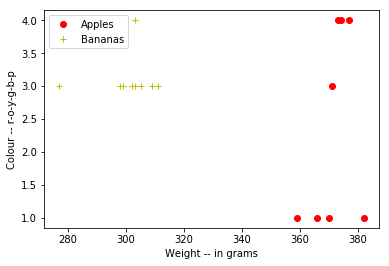

In [46]:
apples = train[train.Label == "A"]
bananas = train[train.Label == "B"]
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(apples.Weight, apples.Colour, "ro")
plt.plot(bananas.Weight, bananas.Colour, "y+")
plt.xlabel("Weight -- in grams")
plt.ylabel("Colour -- r-o-y-g-b-p")
plt.legend(["Apples", "Bananas"])
plt.show()

We  see that similar fruits come close in the feature (weight, color) space? Now let us plot one sample data given in black.

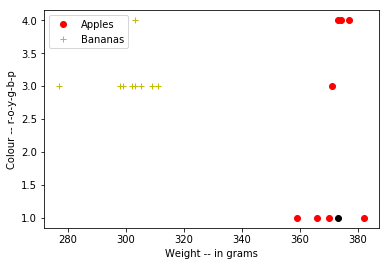

In [47]:
plt.plot(apples.Weight, apples.Colour, "ro")
plt.plot(bananas.Weight, bananas.Colour, "y+")
plt.xlabel("Weight -- in grams")
plt.ylabel("Colour -- r-o-y-g-b-p")
plt.legend(["Apples", "Bananas"])
plt.plot([373], [1], "ko")
plt.show()

From the visualization alone, we can infer that the unknown fruit is likely to be an apple. 

The job now is to instead of eyeballing it one at a time like above, use a kNN classifier with, say, $k = 3$ and using the *Euclidean* distance, to determine the correct label for the data in the file "01-test1.csv" that has 30 data points. 

Let us first write a distance function to calculate the *Euclidean* distance between two fruits.

$distance$ = $\Sigma(a_i -b_i)^2$

In [48]:
import math
def dist(a, b):
    ''' a is the n-dimesnional co-ordinate of point 1
        b is the n-dimensional co-ordinate of point 2'''
    sqSum = 0
    for i in range(len(a)):
        sqSum += (a[i] - b[i]) ** 2
    return math.sqrt(sqSum)

Now let us write code to find the $k$ nearest neighbours of a given fruit

In [49]:
def kNN(k, train, given):
    distances = []
    for t in train.values:              
        # loop over all training samples
        distances.append((dist(t[:2], given), t[2])) 
        # compute and store distance of each training sample from the given sample
    distances.sort()            
    return distances[:k]    # return first k samples = nearest  k distances to the given sample

In [50]:
print(kNN(3, train, (373, 1)))
print(kNN(5, train, (373, 1)))

[(2.8284271247461903, 'A'), (3.0, 'A'), (3.0, 'A')]
[(2.8284271247461903, 'A'), (3.0, 'A'), (3.0, 'A'), (3.1622776601683795, 'A'), (5.0, 'A')]


As you can see above, the 3 (and 5) nearest neighbours of the fruit with the characteristics (373, 1) are all Apples -- label 1; which is what we visually saw when we plotted the point as a black spot in the chart. Of course we need to write another function to get this attribute rather than read, so we have written a function for that. We have used collections.Counter, which we explored in the earlier experiment.

In [51]:
import collections
def kNNmax(k, train, given):
    tally = collections.Counter()
    for nn in kNN(k, train, given):
        tally.update(nn[-1])
    return tally.most_common(1)[0]
print(kNNmax(5, train, (340, 1)))
print(kNNmax(7, train, (340, 1)))

('A', 4)
('A', 5)


This shows that of the five nearest neighbours to (340, 1) four are Apples and of the seven nearest, five are Apples 

Now let us load the test data and find the labels for all of them. Also let us count how many are correct.

In [52]:
from numpy import * 
testData = pd.read_csv(FRUITS_TEST1).values
testResults = pd.read_csv(FRUITS_LABELS1).values.flatten()
results = []
for i, t in enumerate(testData):
    results.append(kNNmax(3, train, t)[0] == testResults[i])
print(results.count(True), "are correct")
print(results.count(False), "are wrong")


30 are correct
0 are wrong


**Exercise 1** :: Find the accuracy of your prediction -- percentage of the samples that are correctly predicted.

In [53]:
# making this as fucntion so can be  reused
def accuracy(results) :
    accuracy = results.count(True)/len(results)
    return (100*accuracy)

In [54]:
print(accuracy(results))

100.0


**Exercise 2** :: Predict the labels for the larger test file that has 72 data points

In [55]:
## Test2 data >> latter part data
from numpy import * 
testData = pd.read_csv(FRUITS_TEST2).values
testResults = pd.read_csv(FRUITS_LABELS2).values.flatten()
results1 = []
for i, t in enumerate(testData):
    results1.append(kNNmax(3, train, t)[0] == testResults[i])
print(results1.count(True), "are correct")
print(results1.count(False), "are wrong")

72 are correct
0 are wrong


Note that with 17 samples we are predicting (rather accurately) the labels on a larger level -- 30 and 72!

**Exercise 3** :: Find the accuracy of the prediction by comparing with "01-test2-labels.csv" 

In [56]:
## Same 
# reused accuracy finder function
print(accuracy(results1))

100.0


**Exercise 4** :: Repeat the above experiment with $k = 5$ and $k = 7$. Explain which $k$ is better and why?

In [57]:
## k = 5 , k = 7
import collections
print(kNN(5, train, (373, 1)))
print(kNN(7, train, (373, 1)))

[(2.8284271247461903, 'A'), (3.0, 'A'), (3.0, 'A'), (3.1622776601683795, 'A'), (5.0, 'A')]
[(2.8284271247461903, 'A'), (3.0, 'A'), (3.0, 'A'), (3.1622776601683795, 'A'), (5.0, 'A'), (7.0, 'A'), (9.0, 'A')]


**Exercise 5** :: Repeat the above experiment with $k = 17$. What do you think is happening?

In [58]:
## k = 17 Accuracy of prediction might decrease (B is majority now)
print(kNN(17, train, (373, 1)))

[(2.8284271247461903, 'A'), (3.0, 'A'), (3.0, 'A'), (3.1622776601683795, 'A'), (5.0, 'A'), (7.0, 'A'), (9.0, 'A'), (14.0, 'A'), (62.03224967708329, 'B'), (64.03124237432849, 'B'), (68.0294054067798, 'B'), (70.02856560004639, 'B'), (70.06425622241343, 'B'), (71.02816342831905, 'B'), (74.02702209328699, 'B'), (75.02666192761077, 'B'), (96.02083107326243, 'B')]


In [59]:
# repeat the expirement with k = 5, 7, and 17
# just for understanding duplicating the code 
# TODO : remove code duplicates
k_factors= [5,7,17]
for k_factor in k_factors:
    # to first data set
    testData = pd.read_csv(FRUITS_TEST1).values
    testResults = pd.read_csv(FRUITS_LABELS1).values.flatten()
    results = []
    for i, t in enumerate(testData):
        # metion the k_factor on which u want result
        results.append(kNNmax(k_factor, train, t)[0] == testResults[i])
    print(results.count(True), "are correct")
    print(results.count(False), "are wrong")
    
    print("Accuracy for FRUITS_LABEL1 with k_factor :",k_factor,"is :",accuracy(results))
    
    

30 are correct
0 are wrong
Accuracy for FRUITS_LABEL1 with k_factor : 5 is : 100.0
30 are correct
0 are wrong
Accuracy for FRUITS_LABEL1 with k_factor : 7 is : 100.0
18 are correct
12 are wrong
Accuracy for FRUITS_LABEL1 with k_factor : 17 is : 60.0


In [60]:
k_factors= [5,7,17]
for k_factor in k_factors:
    # to first data set 2
    testData = pd.read_csv(FRUITS_TEST2).values
    testResults = pd.read_csv(FRUITS_LABELS2).values.flatten()
    results = []
    for i, t in enumerate(testData):
        # metion the k_factor on which u want result
        results.append(kNNmax(k_factor, train, t)[0] == testResults[i])
    print(results.count(True), "are correct")
    print(results.count(False), "are wrong")
    
    print("Accuracy for FRUITS_LABEL1 with k_factor :",k_factor,"is :",accuracy(results))
    

72 are correct
0 are wrong
Accuracy for FRUITS_LABEL1 with k_factor : 5 is : 100.0
72 are correct
0 are wrong
Accuracy for FRUITS_LABEL1 with k_factor : 7 is : 100.0
36 are correct
36 are wrong
Accuracy for FRUITS_LABEL1 with k_factor : 17 is : 50.0


**Exercise 6** :: If the weights are in Kgs, that is divide all of the data in weights column by 1000, what is the accuracy for $k = 3$? 

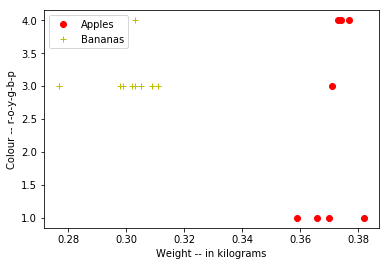

[(2.8284271247461903, 'A'), (3.0, 'A'), (3.0, 'A')]


In [61]:
## Your Code Here
apples = train[train.Label == "A"]
bananas = train[train.Label == "B"]
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(apples.Weight*0.001, apples.Colour, "ro")
plt.plot(bananas.Weight*0.001, bananas.Colour, "y+")
plt.xlabel("Weight -- in kilograms")
plt.ylabel("Colour -- r-o-y-g-b-p")
plt.legend(["Apples", "Bananas"])
plt.show()
import collections
print(kNN(3, train, (373, 1)))

**Exercise 7** :: Modify the distance function to ignore the colour feature. Calculate the accuracy on the smaller test dataset.

In [62]:
### What the fuck is this function doing ????
def dist(a, b):
    sqSum = 0
    for i in range(len(a)):
        sqSum += a[i] ** 2
    return math.sqrt(sqSum)

**Exercise 8** :: If we used the square of the Euclidean distance, for the distance fuction does it affect the accuracy?

In [63]:
# I think this shloud not affect any result at all
# Todo Verify result using below function
def square_distance(a,b) :
    sqSum = 0
    for i in range(len(a)) :
        sqSum += (a[i] - b[i]) ** 2
    # Dont sqaure root
    return sqSum

In [64]:
## Yes
print(kNN(3, train, (373, 1)))

[(277.01624501101014, 'B'), (298.0151002885592, 'B'), (299.015049788468, 'B')]



**Exercise 9** :: If we use the sum of the absolute differences, as the distance metric instead of the Euclidean, how does that affect the accuracy?

In [65]:
##Affect higher dimensions

## Summary
In the above experiment, we find that 
 * a simple nearest neighbour method can successfully predict labels with a small number of labelled examples. 
 * But we also see that the results can go really wrong 
    - if we make some wrong choices (like weight in Kg, or a very large K).

This should remind you about the practical expertise and experimental skills that will become equally important as we move forward.

## Acknowledgment
This experiment is based on the blog post http://www.jiaaro.com/KNN-for-humans. 